# English Premier League (EPL) Pythagorean Predictor

## Step 1

In [1]:
# Load the packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data. 
# EPL results for the 2017/18 season

EPL18 = pd.read_excel('Assignment Data/Week 1/EPL2017-18.xlsx')
print(EPL18.columns.tolist())

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


## Step 2

In [3]:
EPL18.head()

Date        HomeTeam      AwayTeam  FTHG  FTAG FTR
0  20170811         Arsenal     Leicester     4     3   H
1  20170812        Brighton      Man City     0     2   A
2  20170812         Chelsea       Burnley     2     3   A
3  20170812  Crystal Palace  Huddersfield     0     3   A
4  20170812         Everton         Stoke     1     0   H

In [4]:
# create value for home/away wins (win=1, draw=0.5, loss=0)
EPL18['hwin']= np.where(EPL18.FTR=='H', 1, np.where(EPL18.FTR=='D', .5, 0))
EPL18['awin']= np.where(EPL18.FTR=='A', 1, np.where(EPL18.FTR=='D', .5, 0))
EPL18['count']= 1
EPL18.head()

Date        HomeTeam      AwayTeam  FTHG  FTAG FTR  hwin  awin  count
0  20170811         Arsenal     Leicester     4     3   H   1.0   0.0      1
1  20170812        Brighton      Man City     0     2   A   0.0   1.0      1
2  20170812         Chelsea       Burnley     2     3   A   0.0   1.0      1
3  20170812  Crystal Palace  Huddersfield     0     3   A   0.0   1.0      1
4  20170812         Everton         Stoke     1     0   H   1.0   0.0      1

## Step 3

In [5]:
# games played in 2017 vs 2018
df2017= EPL18[EPL18.Date < 20180000]
df2018= EPL18[EPL18.Date > 20180000]

## Step 4 (home team)

In [6]:
# First half of season
# we have to create separate dfs to caluclate home team and away team performance
# here is home team df
home_2017= df2017.groupby('HomeTeam')['count', 'hwin', 'FTHG', 'FTAG'].sum().reset_index()
home_2017= home_2017.rename(columns={'HomeTeam': 'Team', 'count': 'Ph', 'FTHG': 'FTHGh', 'FTAG': 'FTAGh'})
home_2017.head()

Team  Ph  hwin  FTHGh  FTAGh
0      Arsenal  10   8.5     25     10
1  Bournemouth  11   4.5     14     17
2     Brighton  10   5.5     10     12
3      Burnley  10   6.0      7      6
4      Chelsea  11   8.5     21      7

In [7]:
# same thing but away 
away_2017= df2017.groupby('AwayTeam')['count', 'awin', 'FTHG', 'FTAG'].sum().reset_index()
away_2017= away_2017.rename(columns={'AwayTeam': 'Team', 'count': 'Pa', 'FTHG': 'FTHGa', 'FTAG': 'FTAGa'})
away_2017.head()

Team  Pa  awin  FTHGa  FTAGa
0      Arsenal  11   5.0     16     13
1  Bournemouth  10   3.0     15      6
2     Brighton  11   3.0     13      5
3      Burnley  11   6.5     11     11
4      Chelsea  10   7.0      7     18

## Step 5 (home team)

In [8]:
# merge home and away
EPL17= pd.merge(home_2017, away_2017, on='Team')
EPL17

Team  Ph  hwin  FTHGh  FTAGh  Pa  awin  FTHGa  FTAGa
0          Arsenal  10   8.5     25     10  11   5.0     16     13
1      Bournemouth  11   4.5     14     17  10   3.0     15      6
2         Brighton  10   5.5     10     12  11   3.0     13      5
3          Burnley  10   6.0      7      6  11   6.5     11     11
4          Chelsea  11   8.5     21      7  10   7.0      7     18
5   Crystal Palace  11   5.0     14     18  10   2.5     14      4
6          Everton  10   6.5     17     13  11   3.5     19      8
7     Huddersfield  11   6.0     10     12  10   3.0     20      8
8        Leicester  10   5.0     13     14  11   5.0     18     18
9        Liverpool  11   8.5     21      4  10   6.5     20     27
10        Man City  10   9.5     36      7  11  10.5      5     25
11      Man United  11   9.0     24      5  10   6.5     11     19
12       Newcastle  11   4.0      9     13  10   3.0     17     10
13     Southampton  11   5.0     13     15  10   3.0     15      7
14           Stoke  10   5.0     13     19  11   2.5     27     10
15         Swansea  10   3.0      6     15  11   3.0     17      7
16       Tottenham  10   7.5     21      8  10   5.5     12     18
17         Watford  11   4.5     14     23  10   4.5     14     16
18       West Brom  11   4.5     10     15  10   2.5     13      5
19        West Ham   9   4.0     10     14  11   3.0     24     12

## Step 6 (home team)

In [9]:
#  Sum the results by home and away measures to get the team overall performance for the season
EPL17['win']=  EPL17.hwin + EPL17.awin
EPL17['G']= EPL17.Ph + EPL17.Pa
EPL17['GF']= EPL17['FTHGh']+EPL17['FTAGa']
EPL17['GA']= EPL17['FTAGh']+EPL17['FTHGa']
EPL17.head(10)

Team  Ph  hwin  FTHGh  FTAGh  Pa  awin  FTHGa  FTAGa   win   G  \
0         Arsenal  10   8.5     25     10  11   5.0     16     13  13.5  21   
1     Bournemouth  11   4.5     14     17  10   3.0     15      6   7.5  21   
2        Brighton  10   5.5     10     12  11   3.0     13      5   8.5  21   
3         Burnley  10   6.0      7      6  11   6.5     11     11  12.5  21   
4         Chelsea  11   8.5     21      7  10   7.0      7     18  15.5  21   
5  Crystal Palace  11   5.0     14     18  10   2.5     14      4   7.5  21   
6         Everton  10   6.5     17     13  11   3.5     19      8  10.0  21   
7    Huddersfield  11   6.0     10     12  10   3.0     20      8   9.0  21   
8       Leicester  10   5.0     13     14  11   5.0     18     18  10.0  21   
9       Liverpool  11   8.5     21      4  10   6.5     20     27  15.0  21   

   GF  GA  
0  38  26  
1  20  32  
2  15  25  
3  18  17  
4  39  14  
5  18  32  
6  25  32  
7  18  32  
8  31  32  
9  48  24

In [10]:
# Create the win percentage and Pythagorean Expectation
EPL17['wpc17']= EPL17.win/EPL17.G
EPL17['pyth17'] = EPL17['GF']**2/(EPL17['GF']**2 + EPL17['GA']**2)
EPL17.head()

Team  Ph  hwin  FTHGh  FTAGh  Pa  awin  FTHGa  FTAGa   win   G  GF  \
0      Arsenal  10   8.5     25     10  11   5.0     16     13  13.5  21  38   
1  Bournemouth  11   4.5     14     17  10   3.0     15      6   7.5  21  20   
2     Brighton  10   5.5     10     12  11   3.0     13      5   8.5  21  15   
3      Burnley  10   6.0      7      6  11   6.5     11     11  12.5  21  18   
4      Chelsea  11   8.5     21      7  10   7.0      7     18  15.5  21  39   

   GA     wpc17    pyth17  
0  26  0.642857  0.681132  
1  32  0.357143  0.280899  
2  25  0.404762  0.264706  
3  17  0.595238  0.528548  
4  14  0.738095  0.885847

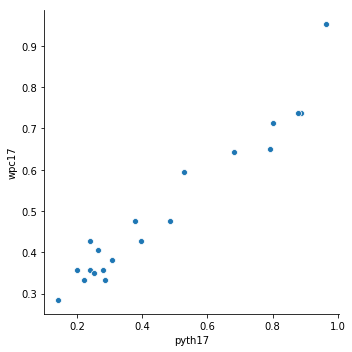

In [11]:
# Plot the data

sns.relplot(x="pyth17", y="wpc17", data =EPL17)

In [12]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc17 ~ pyth17', data=EPL17).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wpc17   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     269.6
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           2.81e-12
Time:                        14:04:15   Log-Likelihood:                 33.822
No. Observations:                  20   AIC:                            -63.64
Df Residuals:                      18   BIC:                            -61.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1978      0.021      9.335      0.000       0.153       0.242
pyth17         0.6551      0.040     16.420      0.000       0.571       0.739
==============================================================================
Omnibus:                        6.775   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                4.322
Skew:                           1.048   Prob(JB):                        0.115
Kurtosis:                       3.891   Cond. No.                         4.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 7 (=Step 4 (away team))

In [13]:
EPL2018home = df2018.groupby(['HomeTeam'])['count','hwin', 'FTHG','FTAG'].sum().reset_index()
EPL2018home = EPL2018home.rename(columns={'HomeTeam':'team','count':'Ph','FTHG':'FTHGh','FTAG':'FTAGh'})
EPL2018home.head()

team  Ph  hwin  FTHGh  FTAGh
0      Arsenal   9   7.5     29     10
1  Bournemouth   8   5.0     12     13
2     Brighton   9   5.5     14     13
3      Burnley   9   3.5      9     11
4      Chelsea   8   4.5      9      9

## Step 7 (=Step 5 (away team))

In [14]:
EPL2018away = df2018.groupby('AwayTeam')['count','awin', 'FTHG','FTAG'].sum().reset_index()
EPL2018away = EPL2018away.rename(columns={'AwayTeam':'team','count':'Pa','FTHG':'FTHGa','FTAG':'FTAGa'})
EPL2018away.head()

team  Pa  awin  FTHGa  FTAGa
0      Arsenal   8   1.0     15      7
1  Bournemouth   9   4.0     16     13
2     Brighton   8   1.5     16      5
3      Burnley   8   4.0     11      9
4      Chelsea   9   4.5     15     14

In [19]:
EPL2018= pd.merge(EPL2018home, EPL2018away, on='team')
EPL2018.head()

team  Ph  hwin  FTHGh  FTAGh  Pa  awin  FTHGa  FTAGa
0      Arsenal   9   7.5     29     10   8   1.0     15      7
1  Bournemouth   8   5.0     12     13   9   4.0     16     13
2     Brighton   9   5.5     14     13   8   1.5     16      5
3      Burnley   9   3.5      9     11   8   4.0     11      9
4      Chelsea   8   4.5      9      9   9   4.5     15     14

## Step 7 (=Step 6 (away team))

In [21]:
# get win, games played, goals scored, goals against 
EPL2018['win']=  EPL2018.hwin + EPL2018.awin
EPL2018['G']= EPL2018.Ph + EPL2018.Pa
EPL2018['GF']= EPL2018['FTHGh']+EPL2018['FTAGa']
EPL2018['GA']=EPL2018['FTAGh']+EPL2018['FTHGa']
EPL2018.head(10)

team  Ph  hwin  FTHGh  FTAGh  Pa  awin  FTHGa  FTAGa   win   G  \
0         Arsenal   9   7.5     29     10   8   1.0     15      7   8.5  17   
1     Bournemouth   8   5.0     12     13   9   4.0     16     13   9.0  17   
2        Brighton   9   5.5     14     13   8   1.5     16      5   7.0  17   
3         Burnley   9   3.5      9     11   8   4.0     11      9   7.5  17   
4         Chelsea   8   4.5      9      9   9   4.5     15     14   9.0  17   
5  Crystal Palace   8   4.5     15      9   9   4.5     14     12   9.0  17   
6         Everton   9   5.5     11      9   8   2.5     17      8   8.0  17   
7    Huddersfield   8   2.5      6     13   9   2.5     13      4   5.0  17   
8       Leicester   9   5.0     12      8   8   2.5     20     13   7.5  17   
9       Liverpool   8   7.0     24      6   9   5.0      8     12  12.0  17   

   GF  GA  
0  36  25  
1  25  29  
2  19  29  
3  18  22  
4  23  24  
5  27  23  
6  19  26  
7  10  26  
8  25  28  
9  36  14

In [24]:
# create the win % and pyth expectation
EPL2018['wpc18']= EPL2018.win / EPL2018.G
EPL2018['pyth18']= EPL2018.GF ** 2 / (EPL2018.GF ** 2 + EPL2018.GA**2)
EPL2018.head(10)

team  Ph  hwin  FTHGh  FTAGh  Pa  awin  FTHGa  FTAGa   win   G  \
0         Arsenal   9   7.5     29     10   8   1.0     15      7   8.5  17   
1     Bournemouth   8   5.0     12     13   9   4.0     16     13   9.0  17   
2        Brighton   9   5.5     14     13   8   1.5     16      5   7.0  17   
3         Burnley   9   3.5      9     11   8   4.0     11      9   7.5  17   
4         Chelsea   8   4.5      9      9   9   4.5     15     14   9.0  17   
5  Crystal Palace   8   4.5     15      9   9   4.5     14     12   9.0  17   
6         Everton   9   5.5     11      9   8   2.5     17      8   8.0  17   
7    Huddersfield   8   2.5      6     13   9   2.5     13      4   5.0  17   
8       Leicester   9   5.0     12      8   8   2.5     20     13   7.5  17   
9       Liverpool   8   7.0     24      6   9   5.0      8     12  12.0  17   

   GF  GA    winpct    pyth18     wpc18  
0  36  25  0.500000  0.674649  0.500000  
1  25  29  0.529412  0.426330  0.529412  
2  19  29  0.411765  0.300333  0.411765  
3  18  22  0.441176  0.400990  0.441176  
4  23  24  0.529412  0.478733  0.529412  
5  27  23  0.529412  0.579491  0.529412  
6  19  26  0.470588  0.348120  0.470588  
7  10  26  0.294118  0.128866  0.294118  
8  25  28  0.441176  0.443577  0.441176  
9  36  14  0.705882  0.868633  0.705882

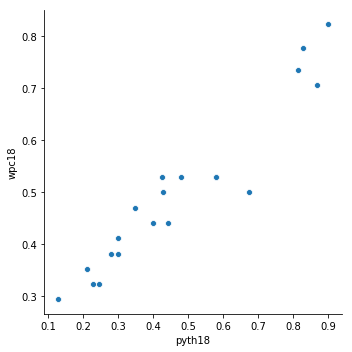

In [25]:
# Plot the data

sns.relplot(x="pyth18", y="wpc18", data =EPL2018)

In [26]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc18 ~ pyth18', data=EPL2018).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wpc18   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     191.1
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           5.02e-11
Time:                        14:09:41   Log-Likelihood:                 34.030
No. Observations:                  20   AIC:                            -64.06
Df Residuals:                      18   BIC:                            -62.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2040      0.024      8.586      0.000       0.154       0.254
pyth18         0.6237      0.045     13.823      0.000       0.529       0.718
==============================================================================
Omnibus:                        5.199   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                2.933
Skew:                          -0.826   Prob(JB):                        0.231
Kurtosis:                       3.890   Cond. No.                         5.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 8

In [39]:
EPL17= EPL17.rename(columns={'Team':'team'})

In [40]:
# merge 2017 and 2018 data
EPL_merge= pd.merge(EPL17, EPL2018[['team', 'wpc18', 'pyth18']], on='team')
EPL_merge.head(10)

team  Ph  hwin  FTHGh  FTAGh  Pa  awin  FTHGa  FTAGa   win   G  \
0         Arsenal  10   8.5     25     10  11   5.0     16     13  13.5  21   
1     Bournemouth  11   4.5     14     17  10   3.0     15      6   7.5  21   
2        Brighton  10   5.5     10     12  11   3.0     13      5   8.5  21   
3         Burnley  10   6.0      7      6  11   6.5     11     11  12.5  21   
4         Chelsea  11   8.5     21      7  10   7.0      7     18  15.5  21   
5  Crystal Palace  11   5.0     14     18  10   2.5     14      4   7.5  21   
6         Everton  10   6.5     17     13  11   3.5     19      8  10.0  21   
7    Huddersfield  11   6.0     10     12  10   3.0     20      8   9.0  21   
8       Leicester  10   5.0     13     14  11   5.0     18     18  10.0  21   
9       Liverpool  11   8.5     21      4  10   6.5     20     27  15.0  21   

   GF  GA     wpc17    pyth17     wpc18    pyth18  
0  38  26  0.642857  0.681132  0.500000  0.674649  
1  20  32  0.357143  0.280899  0.529412  0.426330  
2  15  25  0.404762  0.264706  0.411765  0.300333  
3  18  17  0.595238  0.528548  0.441176  0.400990  
4  39  14  0.738095  0.885847  0.529412  0.478733  
5  18  32  0.357143  0.240356  0.529412  0.579491  
6  25  32  0.476190  0.379018  0.470588  0.348120  
7  18  32  0.428571  0.240356  0.294118  0.128866  
8  31  32  0.476190  0.484131  0.441176  0.443577  
9  48  24  0.714286  0.800000  0.705882  0.868633

## Step 9

In [41]:
# get key variables we want to compare
keyvars= EPL_merge[['team', 'wpc17', 'pyth17', 'wpc18', 'pyth18']]
keyvars.corr()

wpc17    pyth17     wpc18    pyth18
wpc17   1.000000  0.968204  0.756573  0.745832
pyth17  0.968204  1.000000  0.795693  0.795331
wpc18   0.756573  0.795693  1.000000  0.955986
pyth18  0.745832  0.795331  0.955986  1.000000

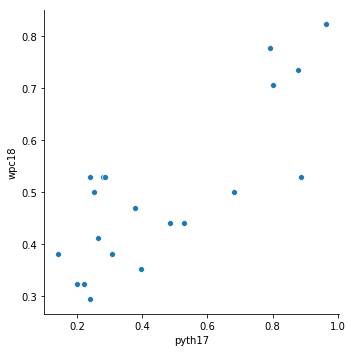

In [44]:
sns.relplot(x="pyth17", y="wpc18", data =EPL_merge)

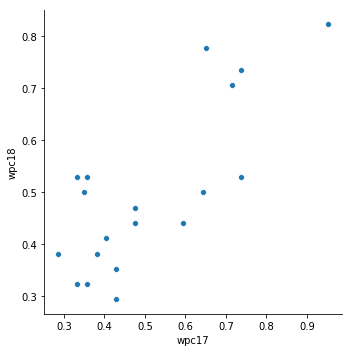

In [45]:
sns.relplot(x="wpc17", y="wpc18", data =EPL_merge)

pyth percentage 17 does a better job then win %